
# Определение стоимости автомобилей


**Цель работы:** Нужно построить модель для определения стоимости.Заказчику важны: качество предсказания,
скорость предсказания,
время обучения  
**Цель применния** : Для внедрения в приложение, в котором можно быстро узнать рыночную стоимость автомобиля

**Исходные данные**:  Исторические данные: технические характеристики, комплектации и цены автомобилей - сервиса по продаже автомобилей с пробегом «Не бит, не крашен» 

### Содержание:
* Импорт библиотек и данных. Подготовка данных
* Обучение моделей
* Вывод


## Импорт библиотек и данных. Подготовка данных 

In [1]:
#  для работы с данными
import pandas as pd
import numpy as np

# для разделения датасета на выборки
from sklearn.model_selection import train_test_split

# для работы с моделью  LinearRegression
from sklearn.linear_model import LinearRegression

# для работы с моделью LGBMRegressor
from lightgbm import LGBMRegressor

# для работы с моделью DummyRegressor
from sklearn.dummy import DummyRegressor

# для cтандартизации набора данных
from sklearn.preprocessing import StandardScaler

# для кодирование признаков
from sklearn.preprocessing import OrdinalEncoder

# для применения перекрёстной проверки
from sklearn.model_selection import cross_val_score

# для работы с метрикой MSE
from sklearn.metrics import mean_squared_error

# для замера времени выполнения программы 
import time

# для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Параметры предупреждений
import warnings
warnings.simplefilter('ignore')


In [2]:
data = pd.read_csv('autos.csv')
display(data.head())
display(data.describe())
display(data.info())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

Данные представлены в виде таблицы, включающей в себя **354369 строк и 16 столбцов** 
При этом 7 столбцов с целочисленными данными  тип < int64 > и 9 столбцов типа < object >.   
Разберём какие в таблице столбцы и какую информацию они содержат:  

**Признаки** 
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* NotRepaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя  

**Целевой признак** 
* Price — цена (евро)


 ### Промежуточный вывод

Можно заметить наличие пропусков во многих столбцах(**VehicleType,Model**...), некорректные данные в столбцах(**RegistrationYear**=9999). Требуется предобработка данных.

### DateCrawled, DateCreated, PostalCode, NumberOfPictures, LastSeen
Данные столбцы можно смело удалить, они никак не влияют на стоимость автомобиля

In [3]:
data=data.drop(['DateCrawled', 'DateCreated', 'PostalCode', 'NumberOfPictures', 'LastSeen','RegistrationMonth'], axis=1)

### Price

Пропусков нет, но есть нулевые значения, которых быть не должно

In [4]:
print('Кол-во автомобилей с нулевой ценой:',len(data[(data['Price'] == 0)]))

Кол-во автомобилей с нулевой ценой: 10772


На стоимость автомобиля оказывает влияние - признак **Model**, в нем есть пропуски. Удалим строки с нулевой ценой и пропуском модели автомобиля

In [5]:
data=data[~(data['Model'].isnull()) & (data['Price'] != 0)]

In [6]:
data['Price'].describe()

count    326076.000000
mean       4622.979655
std        4530.596984
min           1.000000
25%        1200.000000
50%        2950.000000
75%        6642.250000
max       20000.000000
Name: Price, dtype: float64

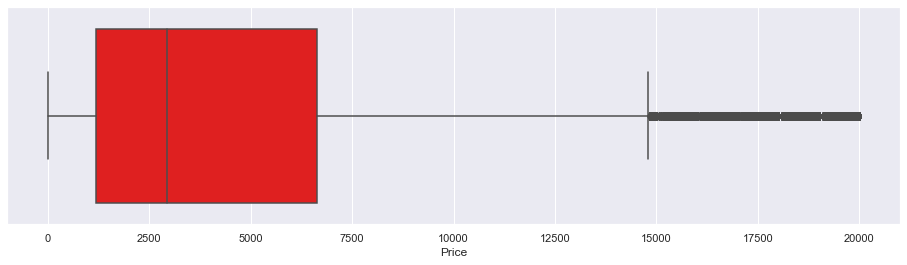

In [7]:
sns.set()
plt.subplots(figsize=(16,4))
sns.boxplot(data['Price'], color="red")
plt.show()

Теперь минимальное значение - 1. Нас это не устраивает.Если рассмотреть более детально,то так же есть автомобили стоимостью менее 100 евро. Конечно, такая стоимость допустима, если машина не на ходу и после дтп, а владелец хочет ее утилизиоровать. Для наших будущих моделей такой низкий целевой признак скажется с негативной стороны. Самостоятельно определим границу минимальной стоимости автомобиля, как quantile = 0.05. Верхнюю границу трогать трогать не будем.


In [8]:
data['Price'].quantile([.05,1])

0.05      380.0
1.00    20000.0
Name: Price, dtype: float64

In [9]:
data= data.query('380 <= Price <= 20000')
data['Price'].describe()

count    309950.000000
mean       4852.156554
std        4531.188483
min         380.000000
25%        1400.000000
50%        3200.000000
75%        6900.000000
max       20000.000000
Name: Price, dtype: float64

### VehicleType

In [10]:
data['VehicleType'].sort_values().unique()

array(['bus', 'convertible', 'coupe', 'other', 'sedan', 'small', 'suv',
       'wagon', nan], dtype=object)

In [11]:
data[(data['VehicleType'].isnull())]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
22,2900,NaN,2018,manual,90,meriva,150000,petrol,opel,no
26,5555,NaN,2017,manual,125,c4,125000,NaN,citroen,no
31,899,NaN,2016,manual,60,clio,150000,petrol,renault,NaN
37,1500,NaN,2016,NaN,0,kangoo,150000,gasoline,renault,no
...,...,...,...,...,...,...,...,...,...,...
354289,5000,NaN,2017,manual,120,other,150000,NaN,citroen,yes
354305,3500,NaN,1995,NaN,0,polo,150000,NaN,volkswagen,NaN
354336,3299,NaN,2005,auto,0,outlander,150000,petrol,mitsubishi,NaN
354346,2600,NaN,2005,auto,0,c_klasse,150000,NaN,mercedes_benz,NaN


Пропусков много, удалять такой объем информации нельзя. Считаю, что заполнить на основе группировок по марке, бренду, года выпуска - это игра в рулетку. Выполним замену **NaN** на **unknown**

In [12]:
data['VehicleType'] = data['VehicleType'].fillna('unknown')

### **RegistrationYear** 

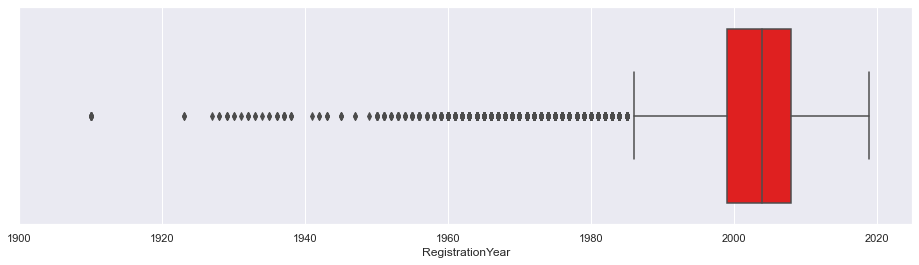

In [13]:
sns.set()
plt.subplots(figsize=(16,4))
sns.boxplot(data['RegistrationYear'], color="red")
plt.xlim(1900, 2025)
plt.show()

In [14]:
data['RegistrationYear'].describe()

count    309950.000000
mean       2003.920126
std          52.792917
min        1000.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        9999.000000
Name: RegistrationYear, dtype: float64

Ограничимся с 1900 по 2021 год. Очень маловероятно, что в продаже будут автомобили старше 1900 года.

In [15]:
data= data.query('1900 <= RegistrationYear <= 2021')
data['RegistrationYear'].describe()

count    309901.000000
mean       2003.483561
std           6.952117
min        1910.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        2019.000000
Name: RegistrationYear, dtype: float64

### Gearbox

In [16]:
data['Gearbox'].sort_values().unique()

array(['auto', 'manual', nan], dtype=object)

Выполним замену **NaN** на **unknown**

In [17]:
data['Gearbox'] = data['Gearbox'].fillna('unknown')

### FuelType

In [18]:
data['FuelType'].sort_values().unique()

array(['cng', 'electric', 'gasoline', 'hybrid', 'lpg', 'other', 'petrol',
       nan], dtype=object)

In [19]:
data_fuel=data['FuelType'].value_counts()

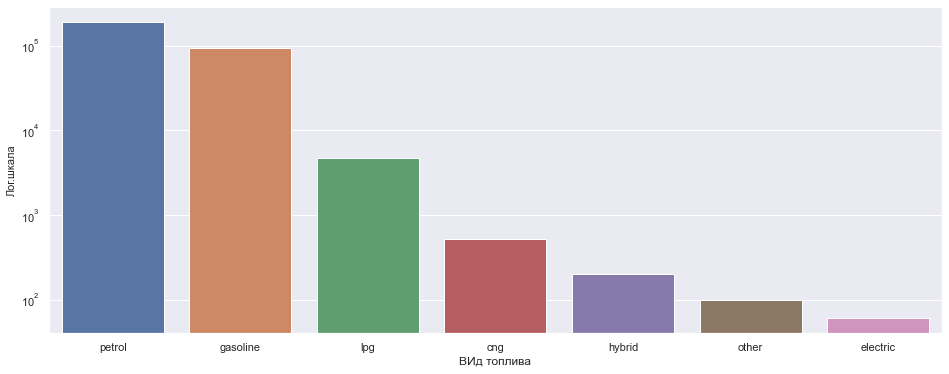

In [20]:
plt.figure(figsize=(16,6))
ax=sns.barplot(y=data_fuel,x=data_fuel.index)
ax.set(yscale="log")
plt.xlabel('ВИд топлива')
plt.ylabel('Лог.шкала', fontsize=11)
plt.show()

Выполним замену на самый популярный тип

In [21]:
data['FuelType'] = data['FuelType'].fillna('petrol')

### NotRepaired

In [22]:
data['NotRepaired'].sort_values().unique()

array(['no', 'yes', nan], dtype=object)

Введем предположение, что пропуски это отсуствие ремонта.

In [23]:
data['NotRepaired'] = data['NotRepaired'].fillna('no')

In [24]:
data.loc[data['NotRepaired'] == 'yes', 'NotRepaired'] = 1
data.loc[data['NotRepaired'] == 'no', 'NotRepaired'] = 0
data['NotRepaired'] = data['NotRepaired'].astype('int64')
data['NotRepaired'].sort_values().unique()

array([0, 1], dtype=int64)

### Промежуточный вывод 

Загружен датасет, получена общая информация;
Обнаружены пропуски, некорректная информация -  часть удалили, малую часть заполнили, наложили на пропуски заглушки.
Подготовка довольна сырая, но тем и хороша, что модель должна обучаться на не идельных данных

In [25]:
#Выделим целовой и остальные признаки:
features = data.drop('Price', axis=1)
# Целевой признак
target = data['Price']

In [26]:
# Применение кодирования OrdinalEncoder
encoder = OrdinalEncoder()
categorical_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
encoder.fit(features[categorical_columns])
features[categorical_columns]= encoder.transform(features[categorical_columns]) 

In [27]:
#Разбиваем данные на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

print("Размер обучающего набора: {}\nРазмер тестового набора:"
         " {}\n".format(X_train.shape[0], X_test.shape[0],))

Размер обучающего набора: 247920
Размер тестового набора: 61981



Масштабируем численные признаки, прибегнув к стандартизации:

In [28]:
# определим столбцы, для которых необходимо применить масштабирование
numeric = ['RegistrationYear','Power','Kilometer']
scaler = StandardScaler()
X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_test[numeric] = scaler.fit_transform(X_test[numeric])

In [29]:
#OHE-кодирование - так как будет использоваться LinearRegression()
ohe_features = pd.get_dummies(features, drop_first=False)

ohe_features_train = ohe_features.loc[X_train.index, :]
ohe_features_test = ohe_features.loc[X_test.index, :]



## Обучение моделей 


### Линейная регрессия 

In [30]:
model_lr = LinearRegression()
#выполняем перекрестную проверку
model_lr_rmse = (cross_val_score(model_lr,ohe_features_train,y_train,cv=5,scoring='neg_mean_squared_error').mean() * -1) ** 0.5
print('RMS на тренировочных данных:',model_lr_rmse.round(1))

RMS на тренировочных данных: 3460.6


In [31]:
start = time.time()
model_lr.fit(ohe_features_train,y_train)
model_lr_predict = model_lr.predict(ohe_features_test)
end = time.time()
model_lr_rmse = (mean_squared_error(y_test,model_lr_predict)**0.5).mean()

print('Средняя прогнозируемая цена:',model_lr_predict.mean().round(1),'RMSE:',model_lr_rmse.round(1))  
print('Скорость работы:', round(end-start,3),'секунд')

Средняя прогнозируемая цена: 4849.7 RMSE: 3416.3
Скорость работы: 0.122 секунд


### LightGBM

In [32]:
model_LGBM = LGBMRegressor()
best_score = 0
for lr in np.geomspace(0.1,1.0,5):
    for estimators in range(100,500,100):
        for depth in range(1,4,1):
            num_leaves = 2**depth
            # для каждой комбинации параметров,обучаем модель
            model_LGBM = LGBMRegressor(learning_rate = lr,
                                       n_estimators = estimators , 
                                       max_depth = depth,
                                       num_leaves = num_leaves,
                                       random_state = 12345)
        # выполняем перекрестную проверку
        model_LGBM_mse = cross_val_score(model_LGBM, X_train, y_train, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
        
        # вычисляем среднюю правильность перекрестной проверки
        model_LGBM_mse_mean =np.mean(model_LGBM_mse*(-1))
        
        #если получаем лучшее значение правильности, сохраняем значение и параметры
        if  model_LGBM_mse_mean > best_score:
            best_score = model_LGBM_mse_mean
            best_parameters = {'learning_rate':lr,'n_estimators': estimators, 'max_depth': depth, 'num_leaves': num_leaves}
            #определим RMSE на лучшей модели тренировочной выборки:
            model_LGBM_RMSE = ((model_LGBM_mse*(-1))**0.5).mean()
            
print('Лучшие параметры:',best_parameters)
print('RMS на тренировочных данных:',model_LGBM_RMSE)

Лучшие параметры: {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 3, 'num_leaves': 8}
RMS на тренировочных данных: 1963.7708530244738


In [33]:
# заново строим модель на наборе
start = time.time()
model_LGBM = LGBMRegressor(**best_parameters,random_state = 12345)
model_LGBM.fit(X_train, y_train)

model_LGBM_predict = model_LGBM.predict(X_test)
end = time.time()
model_LGBM_rmse = (mean_squared_error(y_test,model_LGBM_predict)**0.5).mean()

print('Средняя прогнозируемая цена:',model_LGBM_predict.mean().round(1),'RMSE:',model_LGBM_rmse.round(1))  
print('Скорость работы:',round(end-start,3),'секунд')

Средняя прогнозируемая цена: 4808.1 RMSE: 1967.8
Скорость работы: 1.537 секунд


### Сравнение итоговой относительно константной модели

In [34]:
model_const= DummyRegressor()
model_const.fit(X_train, y_train)
model_const_predict = model_const.predict(X_test)
model_const_rmse = (mean_squared_error(y_test,model_const_predict)**0.5).mean()
print('RMSE:',model_const_rmse.round(1))

RMSE: 4501.1


###  Важности признаков 

In [35]:
importances=model_LGBM.feature_importances_
feature_list = list(X_train.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results.head(10)

,feature,importance
0,RegistrationYear,221
1,Power,161
2,Brand,92
3,Kilometer,71
4,VehicleType,66
5,Model,41
6,NotRepaired,22
7,FuelType,14
8,Gearbox,12


Можно вернуться в начало. Выполнить подготовку данных с учетом данного списка и дальше прогонять через модели.   
Потом перейти к более серьезной настройки модели с контролем "кривых обучения"( к сожалению на данный момент построить у меня не получается)  



## Вывод 


Была выполнена подготовка данных исходного датасета  
Обучены модели LinearRegression и LGBMRegressor(с подбором параметров)  
LGBMRegressor результаты по RMSE:  1968.8  Скорость работы: 1.492 сек  
LinearRegression результаты по RMSE: 3416.3  Скорость работы:0.102 сек  
Выполнено сравнение итоговых относительно константной модели, результат  которых выше констатной